# Part I - (Fordgobike Eda)
## by (Saud Albarkheel)

## Introduction



Introduction:
This exploration analyzes the February 2019 dataset from the Ford GoBike bike-sharing system in the San Francisco Bay Area.
 The dataset includes detailed information on over 183,000 individual trips made in the system.
 Features include trip duration, start and end stations, user demographics, and timestamps.
 
Main Questions:
 - What are the general trends in trip duration and usage time?
 - How do age, gender, and user type affect trip duration?
 - When do people most often ride?

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.

> Note that the collective size of all your files in the current worksapce **must not exceed 1 GB** in total. 


In [2]:

# Load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

# Convert columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Create new features
df['trip_duration_min'] = df['duration_sec'] / 60
df['age'] = 2019 - df['member_birth_year']
df['start_hour'] = df['start_time'].dt.hour
df['start_day'] = df['start_time'].dt.day_name()

# Clean dataset by dropping missing values
df_clean = df.dropna(subset=['member_gender', 'member_birth_year'])

# Display basic info
print("\nDataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nSample rows:\n", df.head())



Dataset shape: (183412, 20)

Data types:
 duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
trip_duration_min                 float64
age                               float64
start_hour                          int32
start_day                          object
dtype: object

Sample rows:
    duration_sec              start_time                end_time  \
0         52185 2019-

In [9]:
# Helper function to set plot titles and labels to avoid repetition
def set_labels(x_label, y_label, title):
    """
    Set the x and y axis labels and the title for a plot.

    Parameters:
    x_label (str): Label for the x-axis
    y_label (str): Label for the y-axis
    title (str): Title of the plot
    """
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


### What is the structure of your dataset?

> The dataset contains 183,412 records and 16 columns. Most columns are numeric, with a few object types representing categorical variables (e.g., user type, gender).



### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is trip duration (in minutes). I'm also interested in how demographic factors (age, gender), and usage patterns (time of day, user type) affect it.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  Useful features include: `age`, `member_gender`, `user_type`, `start_hour`, and `start_day`.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.



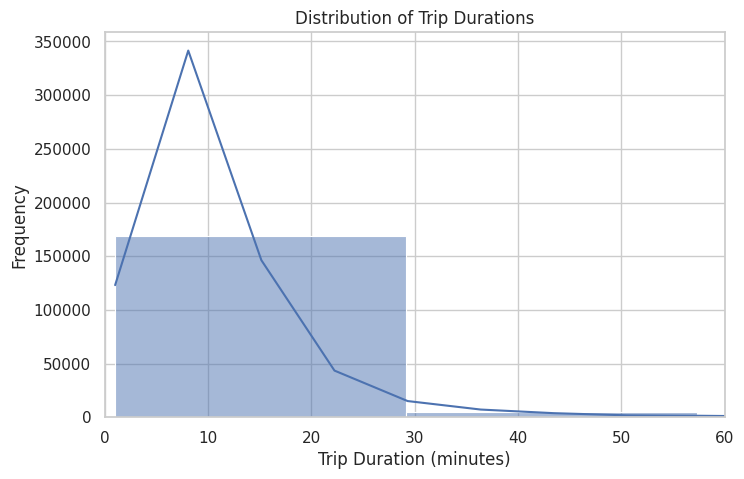

In [10]:
### Question: What is the distribution of trip durations?
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['trip_duration_min'], bins=50, kde=True)
plt.xlim(0, 60)
set_labels('Trip Duration (minutes)', 'Frequency', 'Distribution of Trip Durations')
plt.show()

 Observation: Most trips are short, under 20 minutes. Distribution is right-skewed.

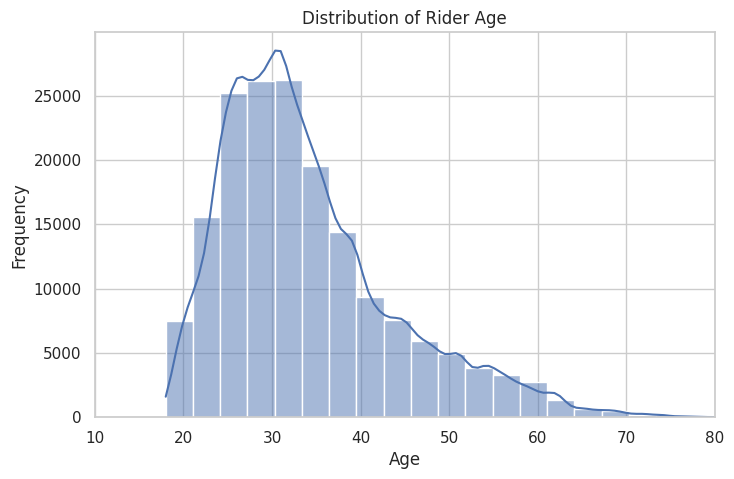

In [11]:
# Question: What is the distribution of rider age?
plt.figure(figsize=(8, 5))
sns.histplot(df_clean['age'], bins=40, kde=True)
plt.xlim(10, 80)
set_labels('Age', 'Frequency', 'Distribution of Rider Age')
plt.show()


Observation: Most riders are between 25 and 40 years old.

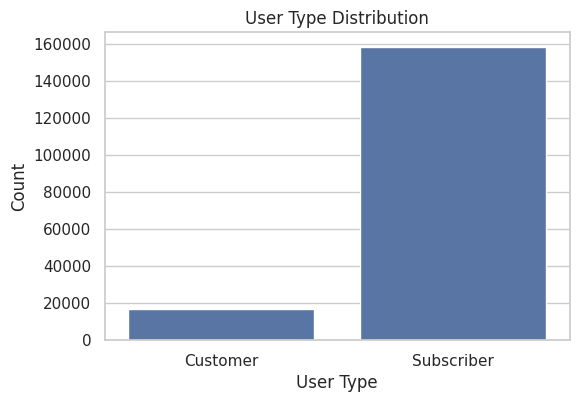

In [12]:
# Question: What is the distribution of user types?
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='user_type')
set_labels('User Type', 'Count', 'User Type Distribution')
plt.show()

 Observation: Most users are Subscribers.

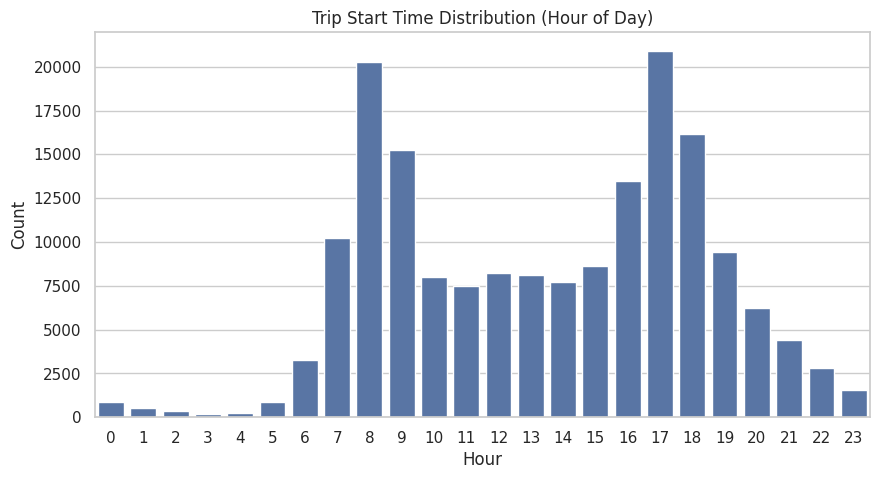

In [13]:
# Question: What are the most common hours trips start?
plt.figure(figsize=(10, 5))
sns.countplot(data=df_clean, x='start_hour')
set_labels('Hour', 'Count', 'Trip Start Time Distribution (Hour of Day)')
plt.show()

There are two clear peaks in trip start time: morning (8 AM) and evening (5 PM), aligning with commute times.


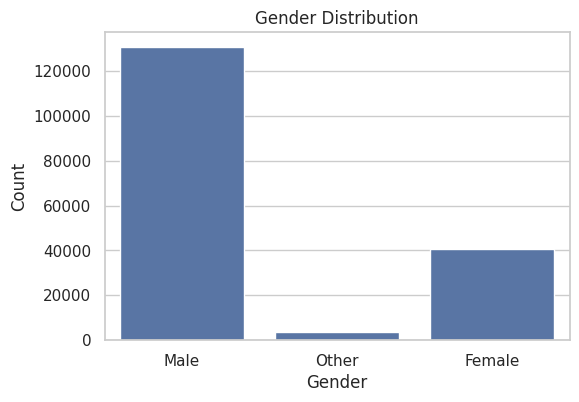

In [14]:
# Question: What is the distribution of gender?
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='member_gender')
set_labels('Gender', 'Count', 'Gender Distribution')
plt.show()

 Observation: Majority of riders are male, followed by female, with a small proportion identifying as 'Other'.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Answer: The main variable of interest is trip duration. Its distribution is highly right-skewed, with most trips lasting under 20 minutes. This is expected, given the nature of short urban trips using shared bikes. However, there were some extreme outliers with unusually long durations, which could represent data errors or edge cases (e.g., bikes not returned promptly). To make the data easier to interpret, I transformed the duration_sec column into trip_duration_min.

I also looked at rider age, which showed a normal-like distribution centered around 30–35 years. This is consistent with the typical age of working adults. There were some outlier ages below 15 and above 80, but these were minimal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Answer: Yes, the trip duration variable had a long tail, so I focused the histogram on durations below 60 minutes to avoid distortion from extreme values. The start_time and end_time columns were converted to datetime objects to allow time-based analysis, from which I extracted start_hour and start_day.

For demographic analysis, I calculated age from the member_birth_year, and dropped rows with missing member_gender or member_birth_year values to keep visualizations clean and interpretable.

These transformations and filtering steps helped ensure the data was in a suitable format for visual and statistical exploration.


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).



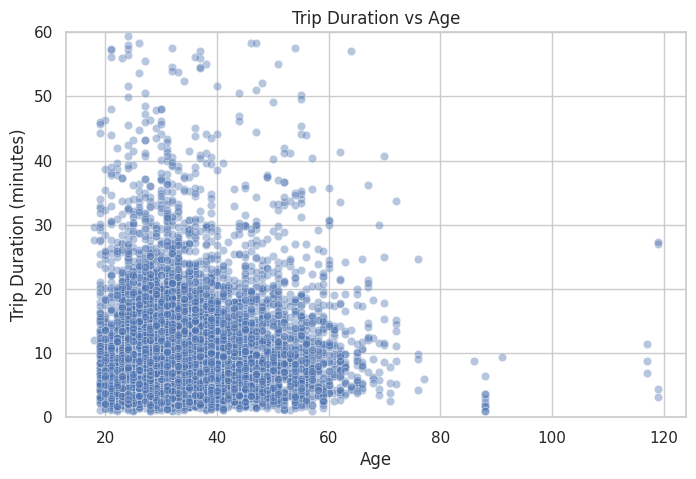

In [18]:
# Age vs Trip Duration (scatter plot)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_clean.sample(10000), x='age', y='trip_duration_min', alpha=0.4)
plt.ylim(0, 60)
set_labels('Age', 'Trip Duration (minutes)', 'Trip Duration vs Age')
plt.show()


Observation:
There’s a slight trend where younger users take longer trips. However, trip duration varies a lot across all ages, and the relationship is weak overall.

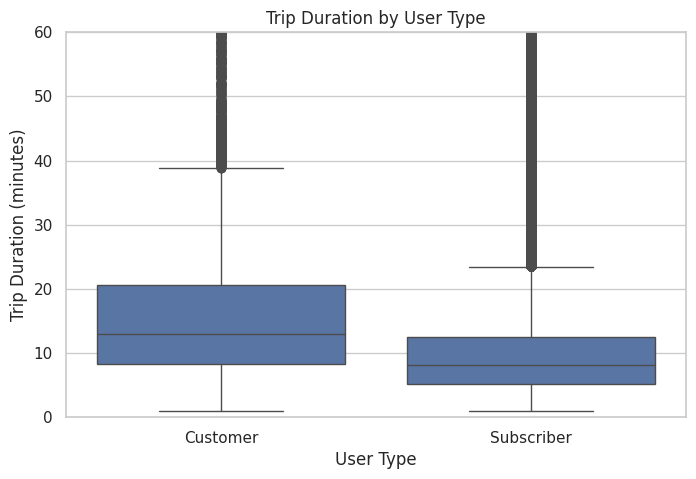

In [19]:
# Trip Duration by User Type (box plot)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='user_type', y='trip_duration_min')
plt.ylim(0, 60)
set_labels('User Type', 'Trip Duration (minutes)', 'Trip Duration by User Type')
plt.show()


Observation:
Customers tend to take longer trips compared to Subscribers. The median trip duration for Customers is noticeably higher.

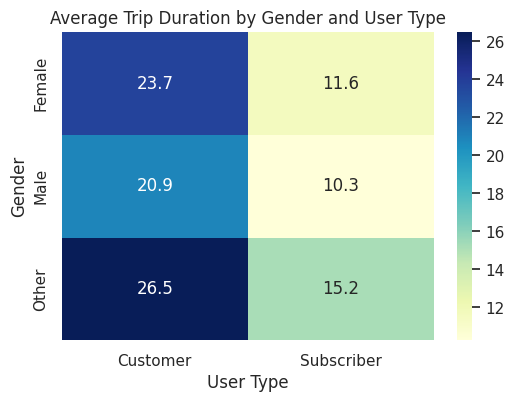

In [20]:
# Heatmap: Average trip duration by gender and user type
pivot = df_clean.pivot_table(values='trip_duration_min', index='member_gender', columns='user_type', aggfunc='mean')

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
set_labels('User Type', 'Gender', 'Average Trip Duration by Gender and User Type')
plt.show()

Riders identifying as “Other” gender and Customers show the longest average trip durations. Subscribers, across all genders, have shorter trips compared to Customers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Trip duration was longer for Customers than Subscribers, and riders identifying as "Other" gender had the highest median durations. Younger users tended to take slightly longer trips, but the trend wasn’t strong.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes, Subscribers rode mostly during commute hours, while Customers used bikes more in off-peak times. Gender also slightly influenced average trip time, especially among Customers.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.



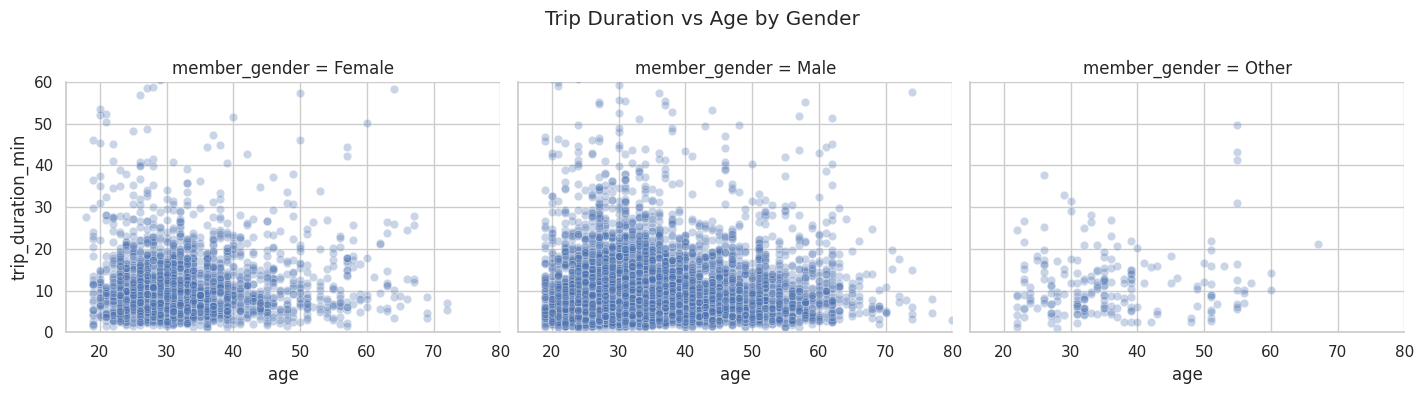

In [22]:
# Sample for faster plotting
sample_df = df_clean.sample(10000, random_state=42)

# Facet grid: Trip duration vs Age by Gender
g = sns.FacetGrid(sample_df, col='member_gender', height=4, aspect=1.2)
g.map(sns.scatterplot, 'age', 'trip_duration_min', alpha=0.3)
g.set(xlim=(15, 80), ylim=(0, 60))
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Trip Duration vs Age by Gender')
plt.show()

Observation:
Across all gender groups, younger users slightly lean toward longer trips. The trend is consistent but not very strong.

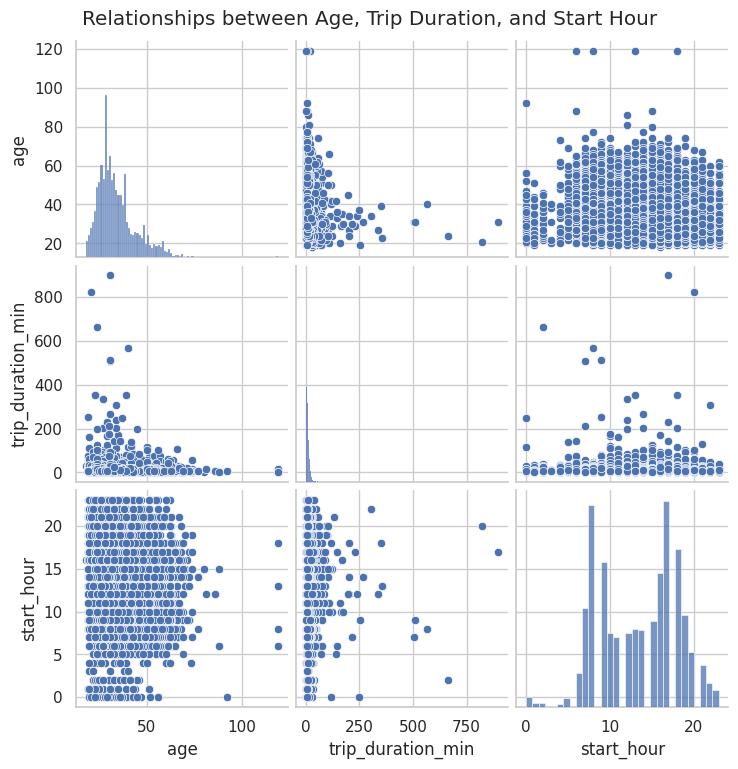

In [24]:
# Pairplot: Age, Trip Duration, and Start Hour
sns.pairplot(sample_df[['age', 'trip_duration_min', 'start_hour']], diag_kind='hist')
plt.suptitle('Relationships between Age, Trip Duration, and Start Hour', y=1.02)
plt.show()

Observation:
Most rides cluster around 8 AM and 5 PM start hours, matching commute times. Short trips dominate regardless of age, but midday trips show slightly longer durations for older users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Yes. age, gender, and user type together helped explain trip duration better than alone. Customers who were younger and identified as “Other” tended to ride longer

### Were there any interesting or surprising interactions between features?

Surprisingly, older users rode more in the middle of the day. Also, the trip duration by age was slightly longer among females and “Other” users compared to males.

## Conclusions
Most bike trips are short, averaging under 20 minutes, and heavily concentrated during morning and evening commute hours.

Subscribers make up the majority of users and tend to ride during rush hours, while Customers use bikes more during the day and take longer trips overall.

Riders between 25–40 years old are the most active. Younger users slightly leaned toward longer trips, but the trend wasn’t strong.

Gender had a small effect on trip duration, with users identifying as “Other” gender riding slightly longer than others.

Trip duration was influenced more when combining factors like user type, age, and gender, rather than looking at just one.

This exploration helped uncover patterns in how different types of users interact with the bike-sharing system. The additional features and transformations (like age and trip time of day) made it easier to compare behaviors and usage trends.

> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML.


> At the end of your report, make sure that you export the notebook as an html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

